<h1> Import Modules


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:


df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
#EDA

df.head(10) 
df.info()
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Cleaning

1. Dropping irrelevant feature
2. Renaming column names
2. Checking for duplicates and null

Dropping irrelevant feature

In [4]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)


Renaming column names

In [5]:
mapping = {'EstimatedSalary':'Estimated_Salary',
           'IsActiveMember':'Active_Member', 
           'NumOfProducts':'Number_of_Products',
           'CreditScore':'Credit_Score', 
           'HasCrCard':'Has_Credit_Card',
           'Exited': 'Customer_Churn'} 

df_cleaned = df.rename(columns=mapping)

df_cleaned

,Credit_Score,Geography,Gender,Age,Tenure,Balance,Number_of_Products,Has_Credit_Card,Active_Member,Estimated_Salary,Customer_Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Checking for duplicates and null

In [6]:
df_cleaned.duplicated().sum()
df_cleaned.isnull().sum()

0

Credit_Score          0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
Number_of_Products    0
Has_Credit_Card       0
Active_Member         0
Estimated_Salary      0
Customer_Churn        0
dtype: int64

### Data Visualisation 

In [7]:
df_cleaned.corr()

/tmp/ipykernel_21/1367570080.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,Credit_Score,Age,Tenure,Balance,Number_of_Products,Has_Credit_Card,Active_Member,Estimated_Salary,Customer_Churn
Credit_Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Number_of_Products,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Has_Credit_Card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Active_Member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Estimated_Salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Customer_Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### Categorical data compared with churn rate

#### Relationship between Geography and Customer Churn

[Text(0.5, 0, 'Geography'), Text(0, 0.5, 'Count')]

Text(0.5, 1.0, 'Geography against Customer Churn')

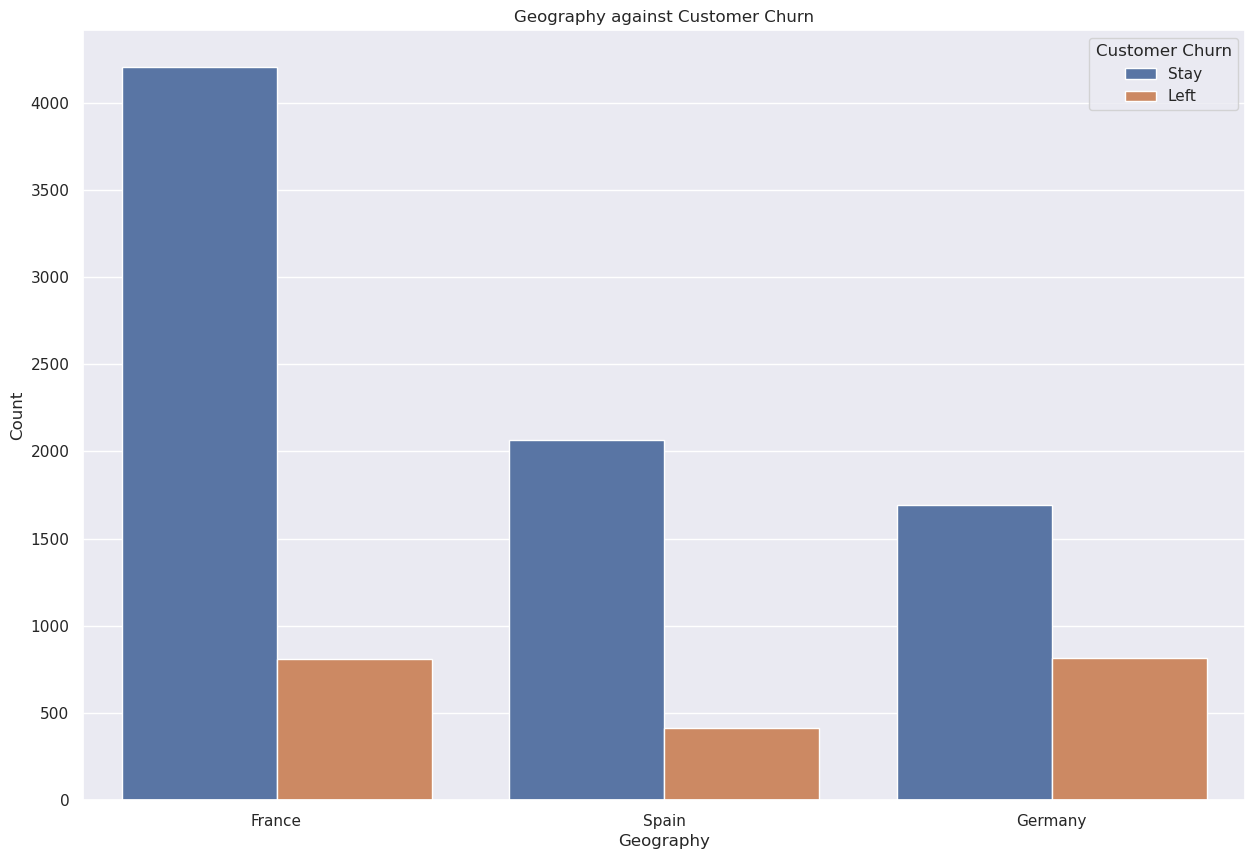

In [8]:
sns.set_theme(style="darkgrid")

fig = plt.subplots(figsize=(15,10))
GeoPlot = sns.countplot(data=df_cleaned,x="Geography", hue="Customer_Churn")
GeoPlot.set(xlabel="Geography",ylabel='Count')

plt.legend(title="Customer Churn", labels=["Stay", "Left"], loc="upper right")
plt.title("Geography against Customer Churn")

plt.show() 

#### Relationship between Gender and Customer Churn

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

Text(0.5, 1.0, 'Gender against Customer Churn')

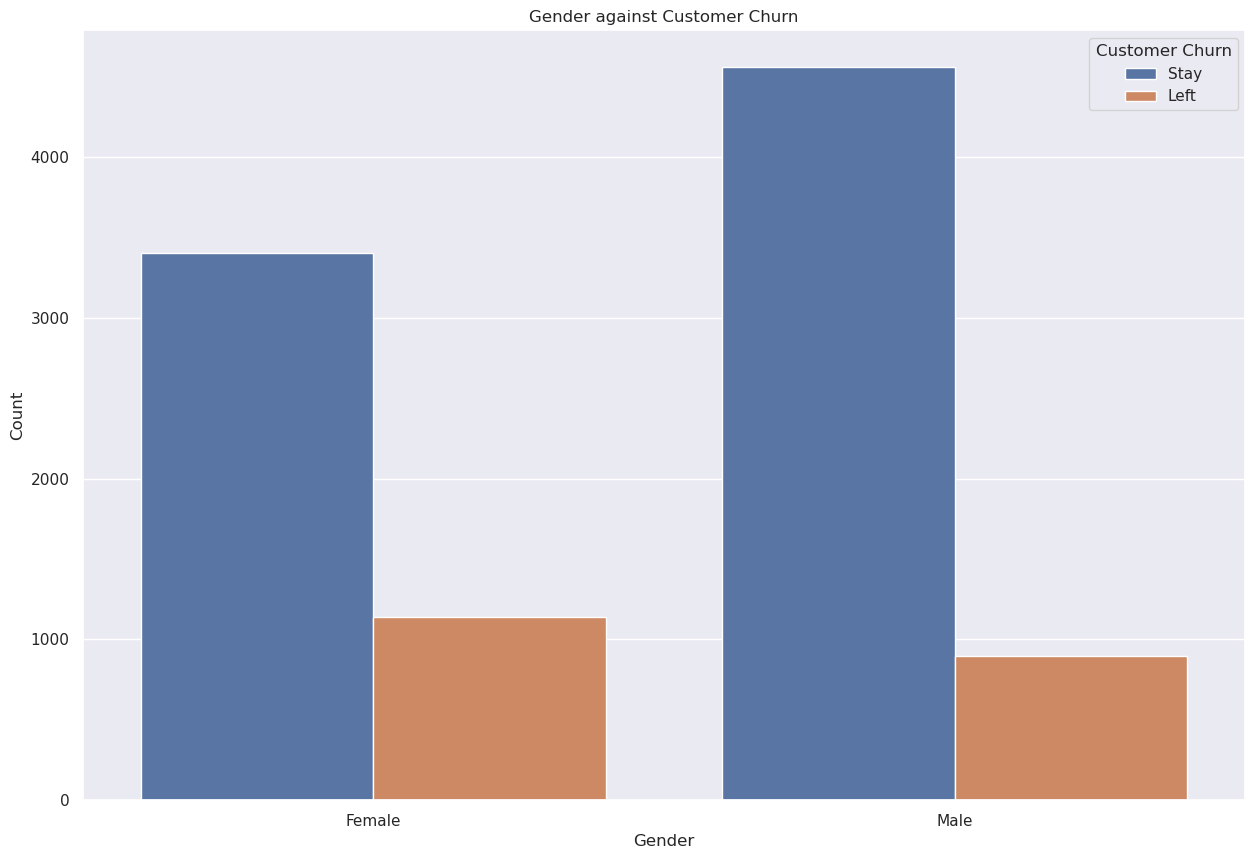

In [9]:
sns.set_theme(style="darkgrid")

fig = plt.subplots(figsize=(15,10))
GenderPlot = sns.countplot(data=df_cleaned,x="Gender", hue="Customer_Churn")
GenderPlot.set(xlabel="Gender",ylabel='Count')

plt.legend(title="Customer Churn", labels=["Stay", "Left"], loc="upper right")
plt.title("Gender against Customer Churn")

plt.show() 

- Females seem to have a higher churn rate as compared to males.

###  Independent Variable distribution 

(<Figure size 1500x1000 with 1 Axes>, <Axes: >)

/tmp/ipykernel_21/1608598943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cleaned.corr(), annot=True, cmap="GnBu")


<Axes: >

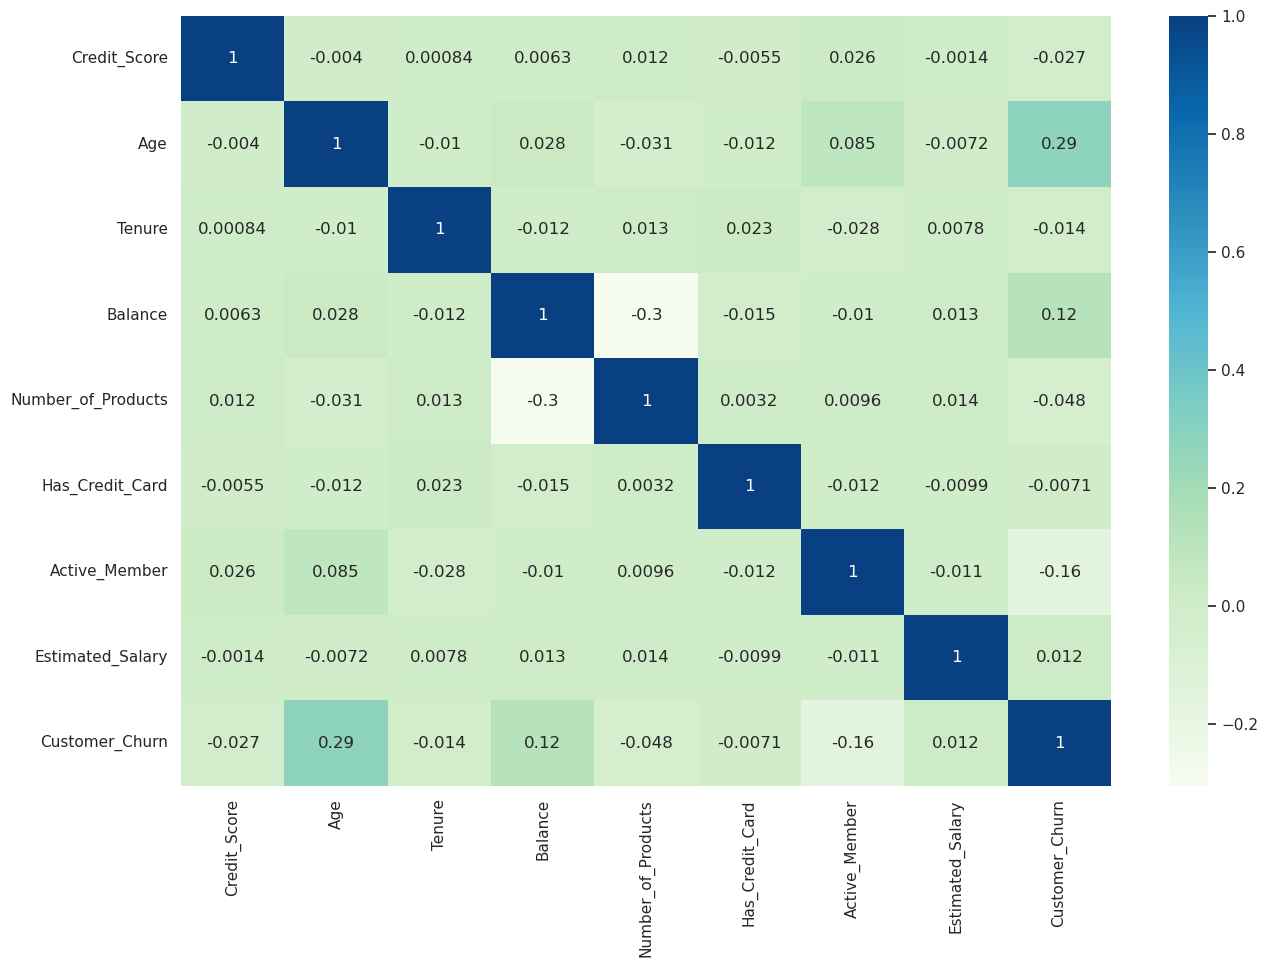

In [10]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="GnBu")
plt.show()

- From the correlation graph, there is a positive correlation between Age, Balance and Estimated Salary to Customer Churn.
We will investigate further to confirm the relationship.

### Correlation between Age and Customer Churn

1. Age and Customer Churn has a correlation score of 0.29. 
2. Age and Is Active Member has a correlation score 0.085.
3. Age and Balance has a correlation score of 0.028.

In [11]:
def Age_range(Age):
    if Age > 80: return 'More than 80'
    elif Age > 70: return 'Between 70 to 80'
    elif Age > 60: return  'Between 60 to 70'
    elif Age > 50: return 'Between 50 to 60'
    elif Age > 40: return 'Between 40 to 50'
    elif Age > 30: return 'Between 30 to 40'
    elif Age >= 20: return 'Between 20 to 30'
    else: return 'Less than 20'
    
df_cleaned['Age_range']=df_cleaned['Age'].map(Age_range)



[Text(0.5, 0, 'Age range'), Text(0, 0.5, 'Count')]

Text(0.5, 1.0, 'Age range against Customer Churn')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Less than 20'),
  Text(1, 0, 'Between 20 to 30'),
  Text(2, 0, 'Between 30 to 40'),
  Text(3, 0, 'Between 40 to 50'),
  Text(4, 0, 'Between 50 to 60'),
  Text(5, 0, 'Between 70 to 80'),
  Text(6, 0, 'More than 80')])

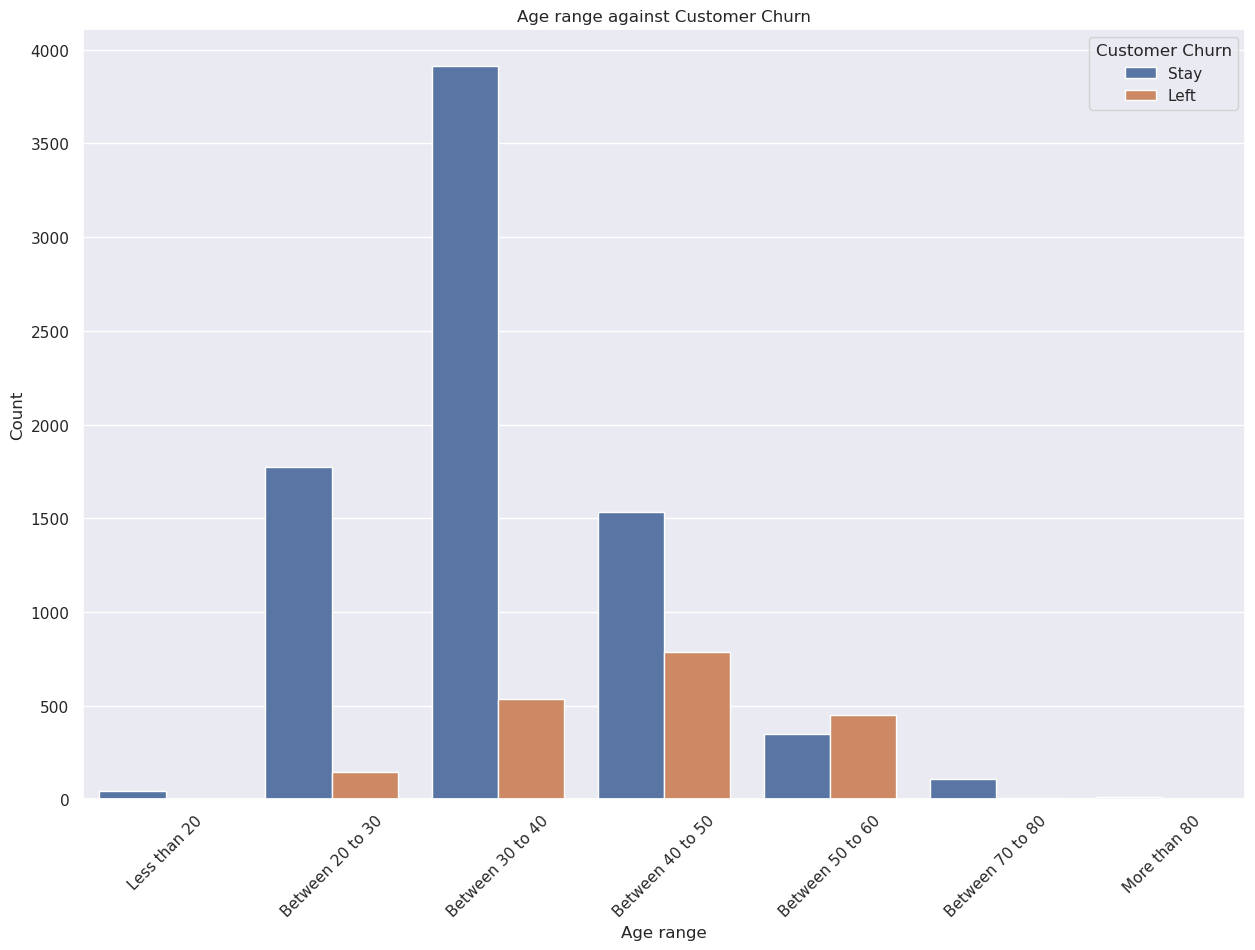

In [12]:
fig = plt.subplots(figsize=(15,10))
AgePlot = sns.countplot(data=df_cleaned,x="Age_range", hue="Customer_Churn",
                          order=['Less than 20', 'Between 20 to 30', 'Between 30 to 40', 'Between 40 to 50', 
                     'Between 50 to 60','Between 70 to 80','More than 80'])
AgePlot.set(xlabel="Age range",ylabel='Count')

plt.legend(title="Customer Churn", labels=["Stay", "Left"], loc="upper right")
plt.title("Age range against Customer Churn")

plt.xticks(rotation=45)
plt.show() 


- From the graph above, generally as the age increase, the number of customers leaving increases.
- The highest amount of customers leaving are those that are aged between 40 to 50.
- The highest amount of customers staying are those that are aged between 30 to 40.

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Active Member')]

Text(0.5, 1.0, 'Age against Active Member')

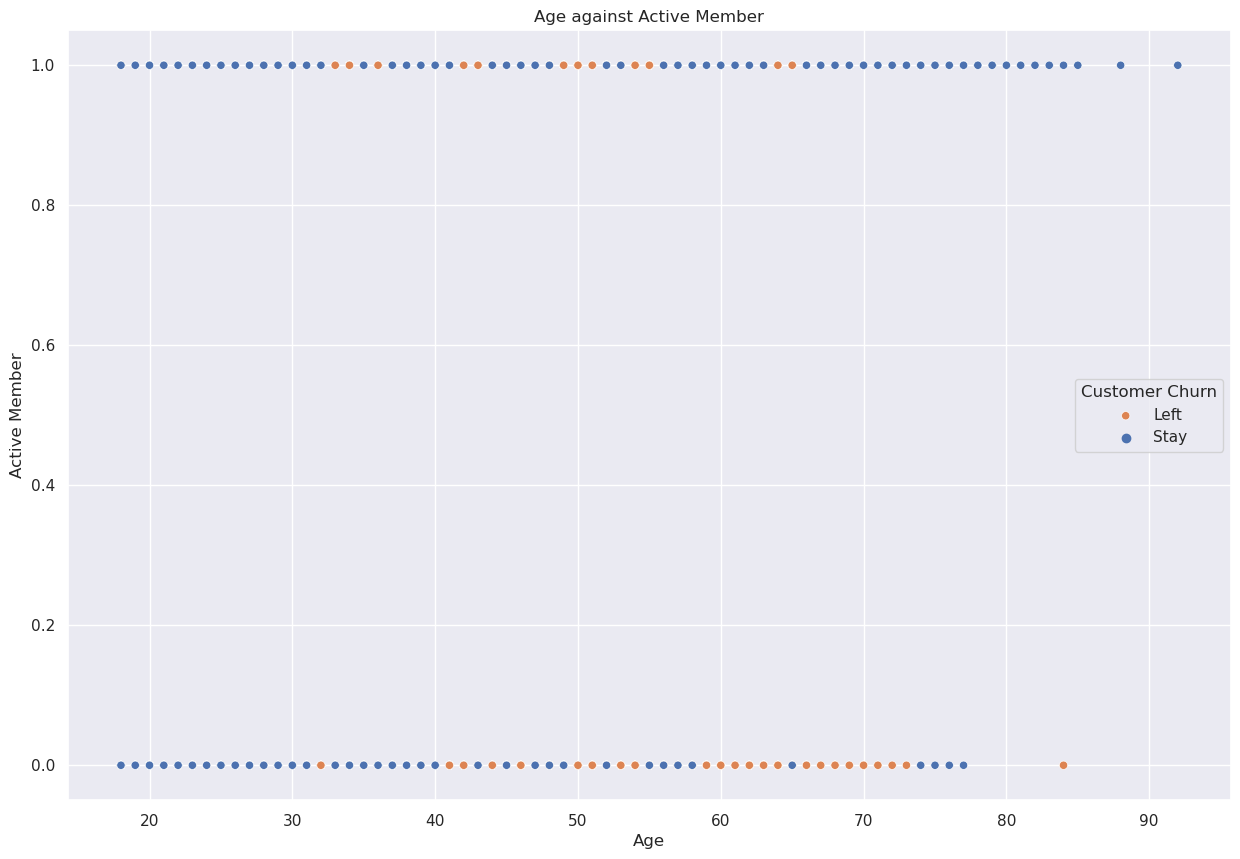

In [13]:
fig = plt.subplots(figsize=(15,10))
AgePlot = sns.scatterplot(x="Age", y= "Active_Member", hue="Customer_Churn",data=df_cleaned)

AgePlot.set(xlabel="Age",ylabel='Active Member')
plt.legend(title="Customer Churn",labels=["Left", "Stay"],loc="center right")
plt.title("Age against Active Member")

plt.show() 


- Non-active members that are 40 to 75 year old has a higher churn as compared to those below 40.

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Balance')]

Text(0.5, 1.0, 'Age against Balance')

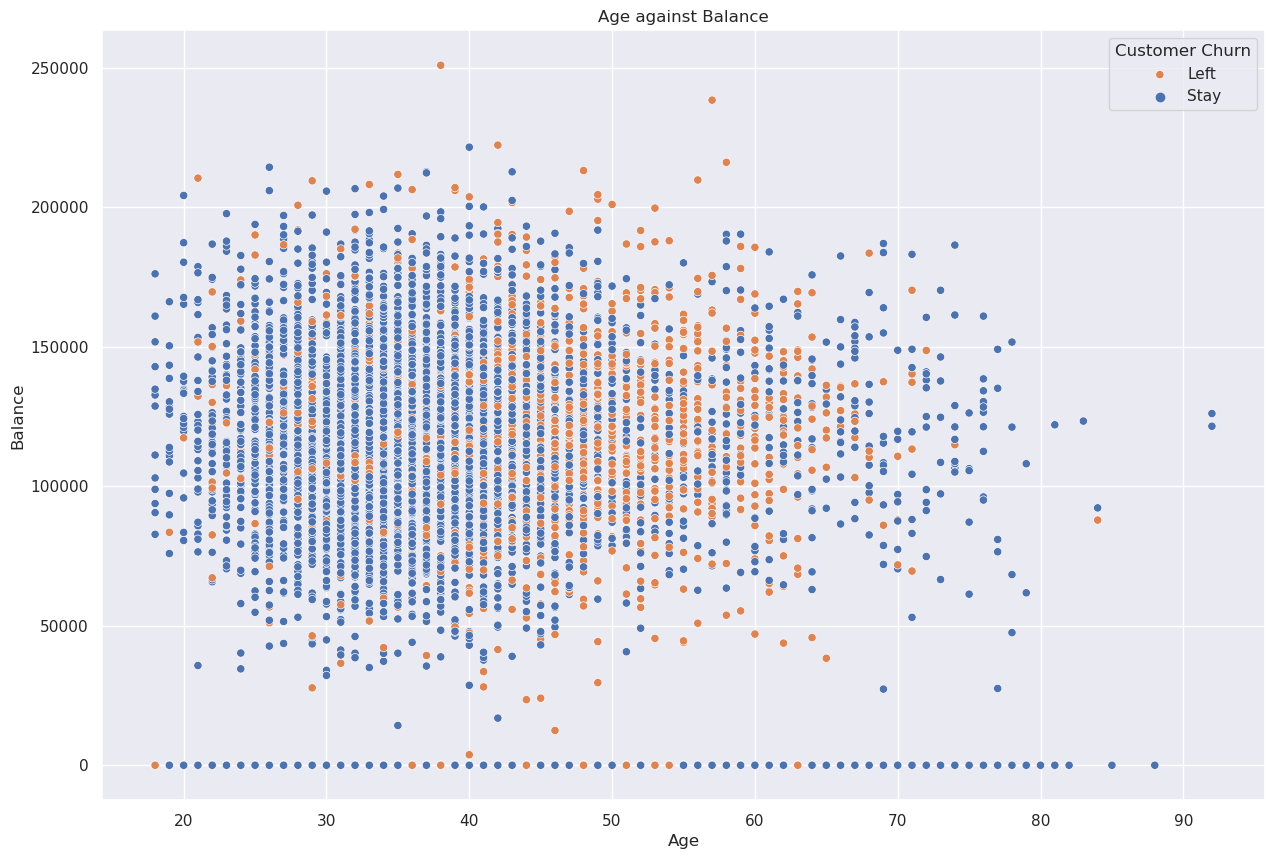

In [14]:
fig = plt.subplots(figsize=(15,10))
AgePlot = sns.scatterplot(x="Age",y = "Balance", hue="Customer_Churn",data=df_cleaned)

AgePlot.set(xlabel="Age",ylabel='Balance')
plt.legend(title="Customer Churn", labels=["Left", "Stay"], loc="upper right")
plt.title("Age against Balance")

plt.show() 

- Majority of the customer churn are from age 40 to 70 and have a balance between 100,000 to 150,000 dollars.


In summary, 

- Age seems to have the strongest correlation to customers that exited.
- The highest churn comes from customer that are 40 to 50 years old. 
- It is understandable that inactive customers has a higher churn as compared to active customers.

### Correlation between Balance and Customer Churn

- Balance and Customer Churn has a correlation score of 0.12. 
- Balance and Age has a correlation score of 0.028 (This has already been shown in the previous section).
- Balance and Estimated Salary has a correlation score 0.013.

In [15]:
def Balance_range(Balance):
    if Balance > 200000: return 'More than 200000'
    elif Balance > 150000: return 'Between 150000 to 200000'
    elif Balance > 100000: return 'Between 100000 to 150000'
    elif Balance > 50000: return 'Between 50000 to 100000'
    elif Balance >= 0: return 'Between 0 to 50000'
    
    
df_cleaned['Balance_range']=df_cleaned['Balance'].map(Balance_range)

[Text(0.5, 0, 'Balance Range'), Text(0, 0.5, 'Count')]

Text(0.5, 1.0, 'Balance Range against Customer Churn')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Between 0 to 50000'),
  Text(1, 0, 'Between 50000 to 100000'),
  Text(2, 0, 'Between 100000 to 150000'),
  Text(3, 0, 'Between 150000 to 200000'),
  Text(4, 0, 'More than 200000')])

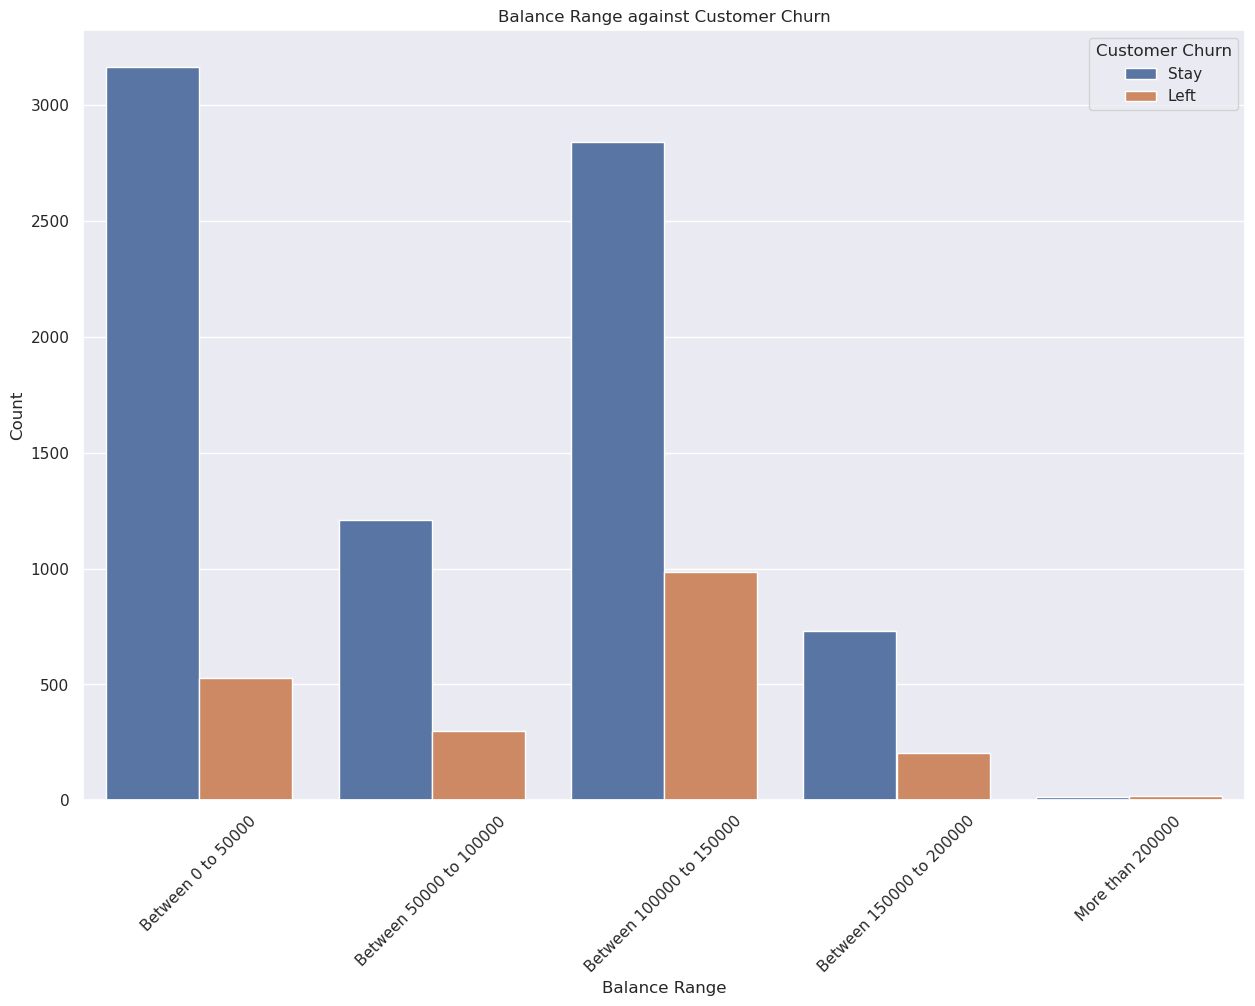

In [16]:
fig = plt.subplots(figsize=(15,10))
BalancePlot = sns.countplot(data=df_cleaned,x="Balance_range", hue="Customer_Churn", 
                        order=['Between 0 to 50000','Between 50000 to 100000','Between 100000 to 150000',
                               'Between 150000 to 200000','More than 200000'])

BalancePlot.set(xlabel="Balance Range",ylabel='Count')

plt.legend(title="Customer Churn", labels=["Stay", "Left"], loc="upper right")
plt.title("Balance Range against Customer Churn")

plt.xticks(rotation=45)
plt.show() 

- Customers with a balance between 100000 to 150000 have the highest leaving rate which is a similar finding to the scatterplot between Age and Balance above. 

[Text(0.5, 0, 'Balance'), Text(0, 0.5, 'Estimated Salary')]

Text(0.5, 1.0, 'Balance against Estimated Salary')

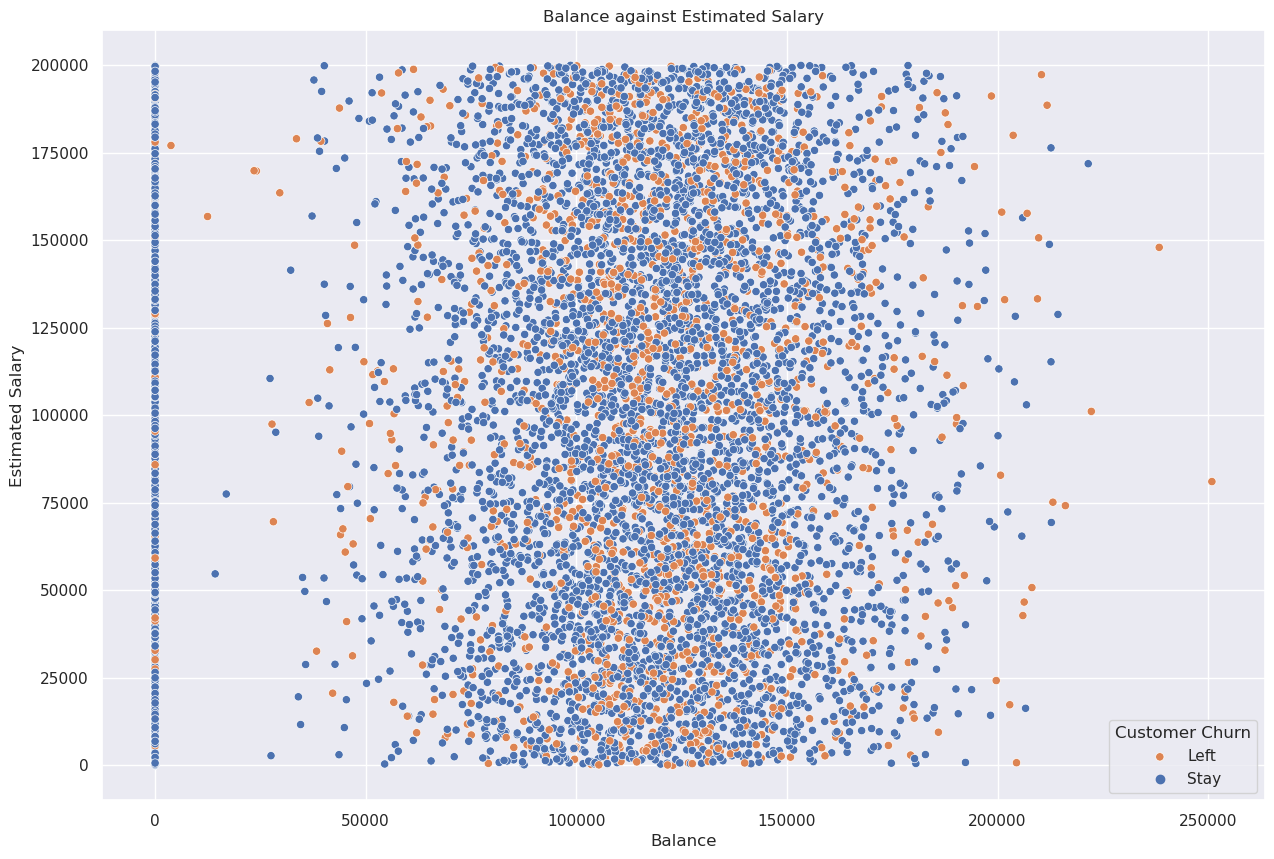

In [17]:
fig = plt.subplots(figsize=(15,10))
BalancePlot = sns.scatterplot(x="Balance",y = "Estimated_Salary", hue="Customer_Churn",data=df_cleaned)

BalancePlot.set(xlabel="Balance",ylabel='Estimated Salary')
plt.legend(title="Customer Churn", labels=["Left", "Stay"], loc="lower right")
plt.title("Balance against Estimated Salary")

plt.show() 

### Correlation between Estimated Salary and Customer Churn

In [18]:
def Salary_range(Salary):
    if Salary > 200000: return 'More than 200000'
    elif Salary > 150000: return 'Between 150000 to 200000'
    elif Salary > 100000: return 'Between 100000 to 150000'
    elif Salary > 50000: return 'Between 50000 to 100000'
    elif Salary >= 0: return 'Between 0 to 50000'
    
df_cleaned['Salary_range']=df_cleaned['Estimated_Salary'].map(Salary_range)

[Text(0.5, 0, 'Salary range'), Text(0, 0.5, 'Count')]

Text(0.5, 1.0, 'Salary range against Customer Churn')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Between 0 to 50000'),
  Text(1, 0, 'Between 50000 to 100000'),
  Text(2, 0, 'Between 100000 to 150000'),
  Text(3, 0, 'Between 150000 to 200000'),
  Text(4, 0, 'More than 200000')])

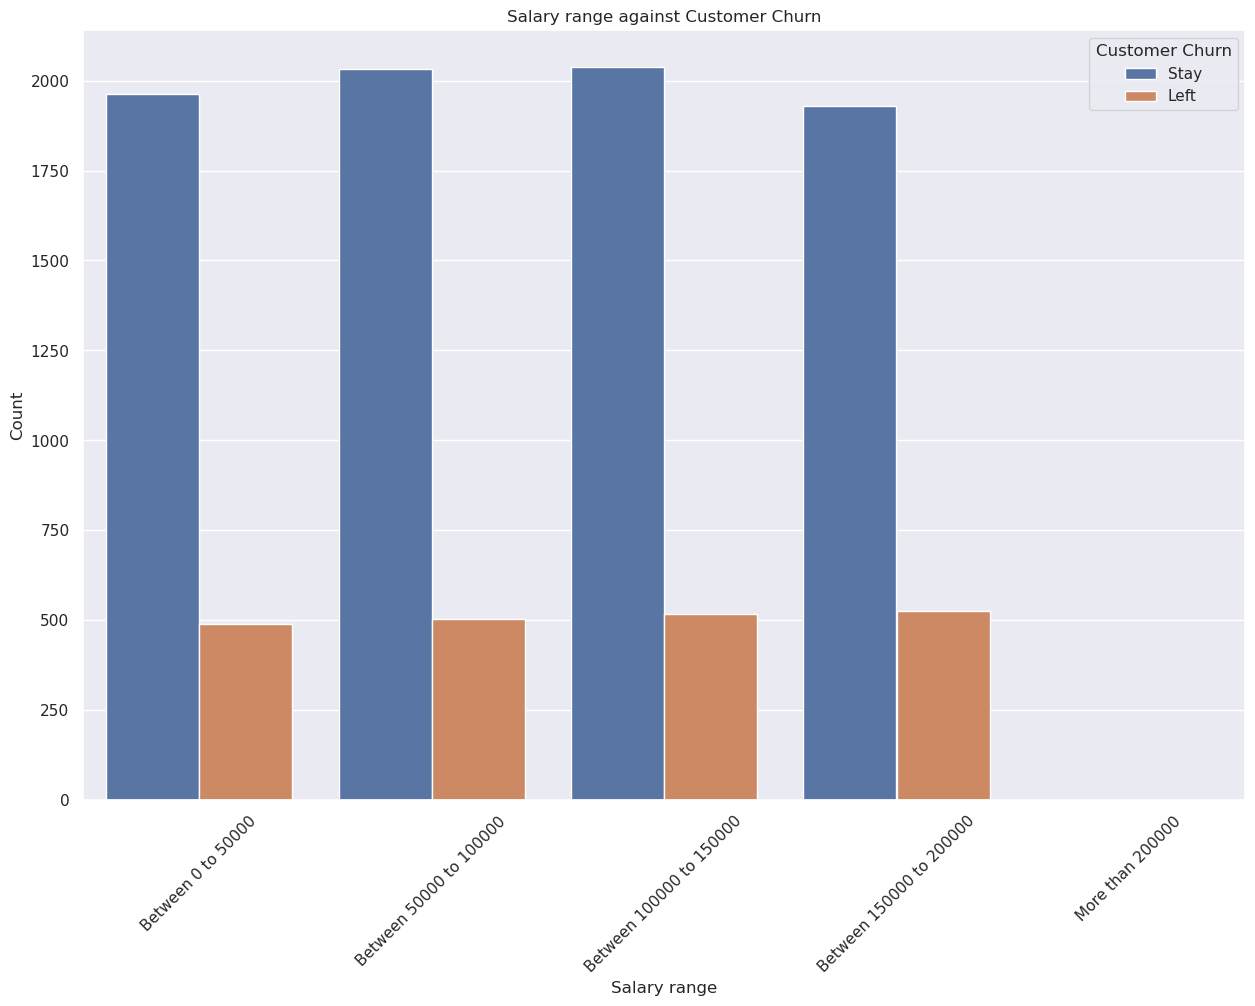

In [19]:
fig = plt.subplots(figsize=(15,10))
SalaryPlot = sns.countplot(data=df_cleaned,x="Salary_range", hue="Customer_Churn", 
                        order=['Between 0 to 50000','Between 50000 to 100000','Between 100000 to 150000',
                               'Between 150000 to 200000','More than 200000'])

SalaryPlot.set(xlabel="Salary range",ylabel='Count')

plt.legend(title="Customer Churn", labels=["Stay", "Left"], loc="upper right")
plt.title("Salary range against Customer Churn")

plt.xticks(rotation=45)
plt.show() 

[Text(0.5, 0, 'Estimated Salary'), Text(0, 0.5, 'Number of Products')]

Text(0.5, 1.0, 'Estimated Salary against Number of Products')

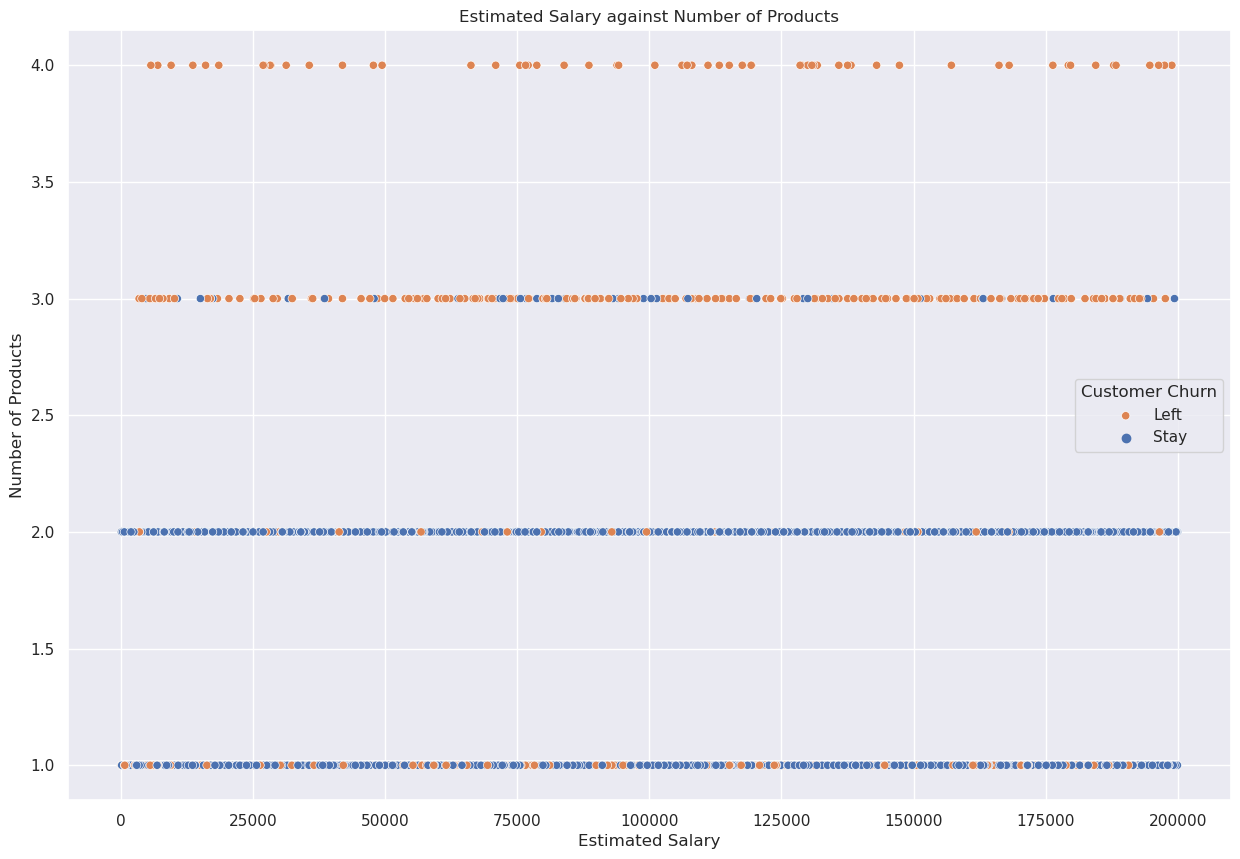

In [20]:
fig = plt.subplots(figsize=(15,10))
SalaryPlot = sns.scatterplot(x="Estimated_Salary",y = "Number_of_Products", hue="Customer_Churn",data=df_cleaned)

SalaryPlot.set(xlabel="Estimated Salary",ylabel='Number of Products')
plt.legend(title="Customer Churn", labels=["Left", "Stay"], loc="center right")
plt.title("Estimated Salary against Number of Products")

plt.show() 

### KNearest Neighbours

In [21]:
#preprocessing df_cleaned
#converting all object dtype in df_cleaned into numerical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df_cleaned:
    if df_cleaned[col].dtypes=='object':
        df_cleaned[col]=le.fit_transform(df_cleaned[col])

In [22]:
y = df_cleaned.pop("Customer_Churn") #pop out last column
X = df_cleaned #columns except for "Customer_Churn" will be input

In [23]:
#import libraries for KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score


0.813
0.815
0.8185
0.817
0.8145
0.8135
0.8125
0.814
0.817
0.8155


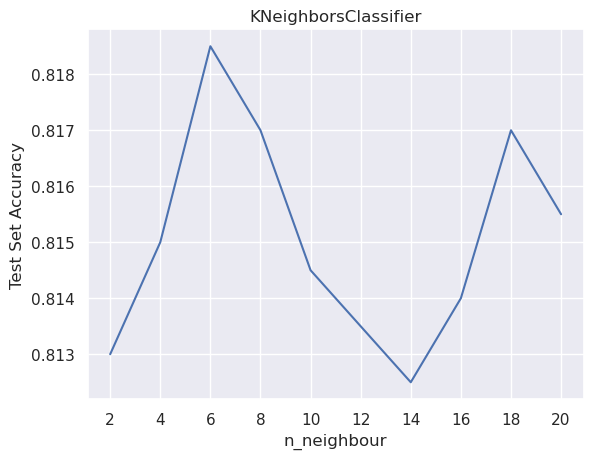

In [24]:
#split X and y into training and testing set: train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45, test_size=0.2)

#scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

scores = [] #create blank list

for n in range(2, 20+1,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    _ = knn.fit(scaled_X_train, y_train)
    y_pred_class = knn.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, y_pred_class))
    print(accuracy_score(y_test, y_pred_class))
    
_ = plt.plot(scores)
_ = plt.xticks(ticks=range(10), labels=range(2,20+1,2))
_ = plt.title("KNeighborsClassifier")
_ = plt.xlabel('n_neighbour')
_ = plt.ylabel('Test Set Accuracy')


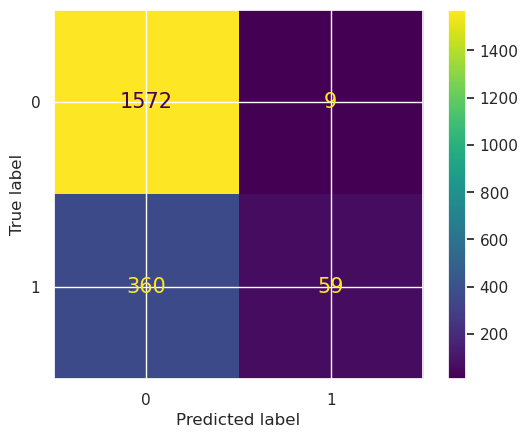

In [25]:
#reliability of KNearest Neighbors model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

font = {'family' : 'normal',
        'size'   : 15}
plt.rc('font', **font) 

cm = confusion_matrix(y_test, y_pred_class)

cm_display = ConfusionMatrixDisplay(cm).plot()


In [26]:
TP = cm[1,1]
TN = cm[0,0]

print(f'With a test size of {cm.sum()}, {TP} labels are identified as True Positive using KNearest Neighbors model.')
print(f'With a test size of {cm.sum()}, {TN} labels are identified as True Negative using KNearest Neighbors model.')
print(f'Using KNearest Neighbors model, {(TP+TN)/cm.sum() * 100}% of the labels are correctly classified.')

With a test size of 2000, 59 labels are identified as True Positive using KNearest Neighbors model.
With a test size of 2000, 1572 labels are identified as True Negative using KNearest Neighbors model.
Using KNearest Neighbors model, 81.55% of the labels are correctly classified.


### Decision Tree Model

In [27]:
#import libraries for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# initialize
dt = DecisionTreeClassifier(random_state=45)

from sklearn.model_selection import train_test_split
#using the same train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.2)

#scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

dt.fit(scaled_X_train,y_train)

y_preds = dt.predict(scaled_X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

DecisionTreeClassifier(random_state=45)

0.748

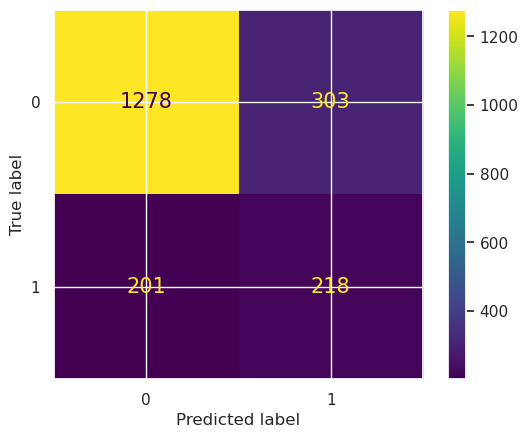

In [28]:
#reliability of Decision Tree Classifier
font = {'family' : 'normal', 'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [29]:
TP = cm[1,1]
TN = cm[0,0]

print(f'With a test size of {cm.sum()}, {TP} labels are identified as True Positive using Decision Tree Classifier.')
print(f'With a test size of {cm.sum()}, {TN} labels are identified as True Negative using Decision Tree Classifier.')
print(f'Using Decision Tree Classifier, {(TP+TN)/cm.sum() * 100}% of the labels are correctly classified.')

With a test size of 2000, 218 labels are identified as True Positive using Decision Tree Classifier.
With a test size of 2000, 1278 labels are identified as True Negative using Decision Tree Classifier.
Using Decision Tree Classifier, 74.8% of the labels are correctly classified.


### Logistic Regression

In [30]:
#import libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#initialize LogisticRegression
logreg = LogisticRegression()

#using the train size 80%, test size 20% 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.2)

#scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

logreg.fit(scaled_X_train, y_train)

y_pred = logreg.predict(scaled_X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))

LogisticRegression()

Accuracy: 0.808


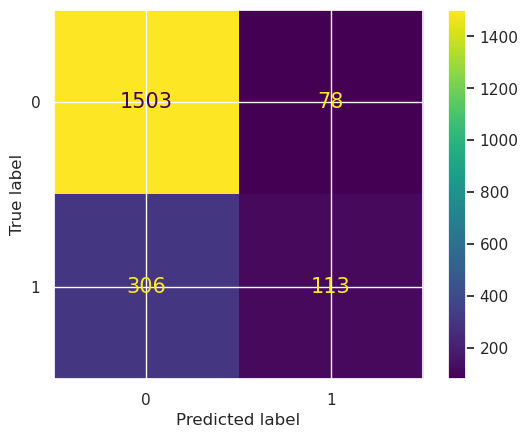

In [31]:
#reliability of Logistic Regression model

font = {'family' : 'normal', 'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
TP = cm[1,1]
TN = cm[0,0]

print(f'With a test size of {cm.sum()}, {TP} labels are identified as True Positive using Logististic Regression model.')
print(f'With a test size of {cm.sum()}, {TN} labels are identified as True Negative using Logististic Regression model.')
print(f'Using Logististic Regression model, {(TP+TN)/cm.sum() * 100}% of the labels are correctly classified.')

With a test size of 2000, 113 labels are identified as True Positive using Logististic Regression model.
With a test size of 2000, 1503 labels are identified as True Negative using Logististic Regression model.
Using Logististic Regression model, 80.80000000000001% of the labels are correctly classified.


In [ ]:
Thank You